## Importing Packages

In [2]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [3]:
year = 2023
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (237.56 MB) C:\Users\odath\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
_api        WARNING 	Driver  3: Car data is incomplete!
_api        WARNING 	Driver  5: Car data is incomplete!
_api        WARNING 	Driver  6: Car data is incomplete!
_api        WARNING 	Driver  7: Car data is inco

## Loading and Preparing Lap Data

In [4]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
494,0 days 01:03:50.318000,ALB,23,0 days 00:01:41.364000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:39.814000,...,Williams,0 days 01:02:08.731000,2023-07-09 14:03:09.767,1,10.0,False,,False,False,101.364
495,0 days 01:05:25.322000,ALB,23,0 days 00:01:35.004000,2.0,1.0,NaT,NaT,0 days 00:00:29.913000,0 days 00:00:38.718000,...,Williams,0 days 01:03:50.318000,2023-07-09 14:04:51.354,1,10.0,False,,False,True,95.004
496,0 days 01:06:59.131000,ALB,23,0 days 00:01:33.809000,3.0,1.0,NaT,NaT,0 days 00:00:29.457000,0 days 00:00:38.587000,...,Williams,0 days 01:05:25.322000,2023-07-09 14:06:26.358,1,10.0,False,,False,True,93.809
497,0 days 01:08:32.997000,ALB,23,0 days 00:01:33.866000,4.0,1.0,NaT,NaT,0 days 00:00:29.454000,0 days 00:00:38.504000,...,Williams,0 days 01:06:59.131000,2023-07-09 14:08:00.167,1,10.0,False,,False,True,93.866
498,0 days 01:10:06.857000,ALB,23,0 days 00:01:33.860000,5.0,1.0,NaT,NaT,0 days 00:00:29.557000,0 days 00:00:38.255000,...,Williams,0 days 01:08:32.997000,2023-07-09 14:09:34.033,1,10.0,False,,False,True,93.860


## Compound color map

In [7]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

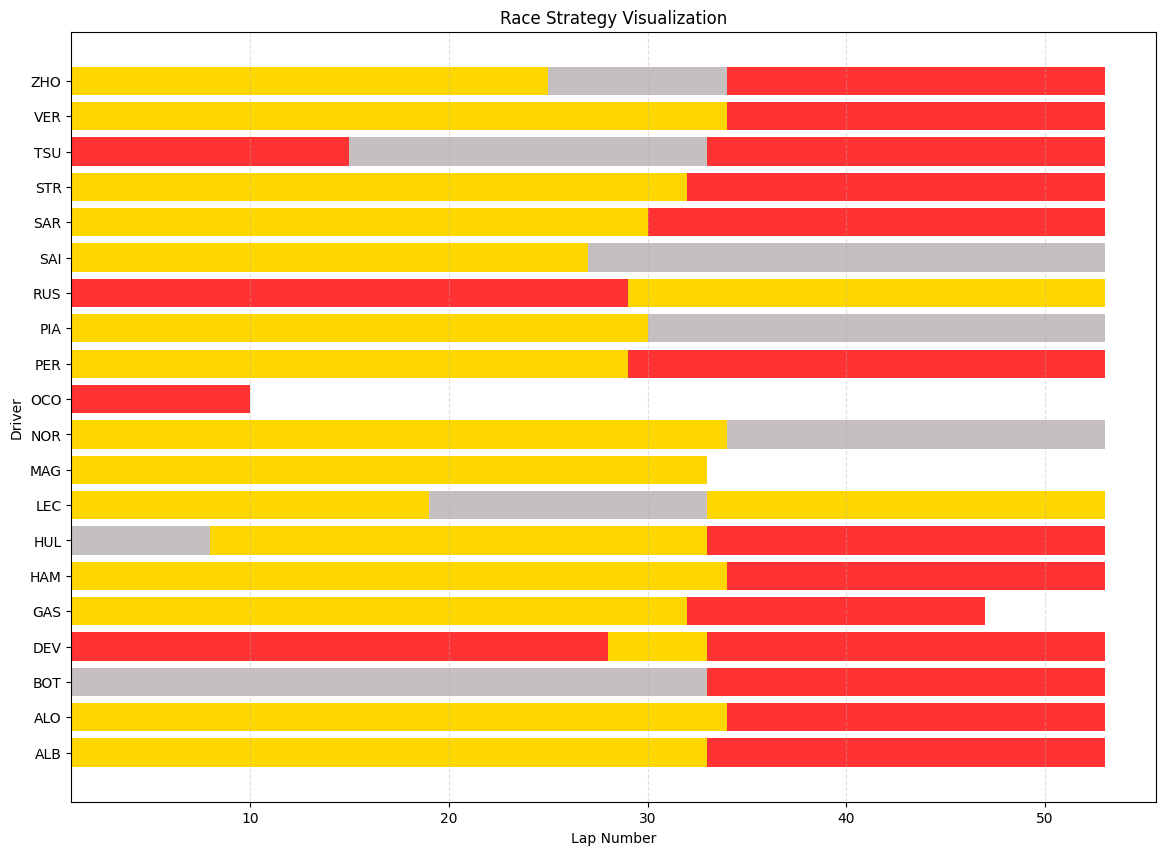

In [8]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
